**primary data analysis**

- Has Missing Values? **No**
- Has 1 categorical features - verification.result with 2 classes - True or False whitch seems to be best candidat for target value for classification
- Seems like verification.time should not be included as feature
- Seems like property.winner column should not be included as fuature, as its other interpritation of verification.result feature and is calculated value
 based on other values


In [83]:
from google.colab import drive
import os.path
drive.mount('/content/gdrive', force_remount=True)
data_set_path = '/content/gdrive/MyDrive/ML/HW12-1/'




Mounted at /content/gdrive


Getting Dataset from csv file on GoogleDrive:

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(data_set_path + 'data.csv')

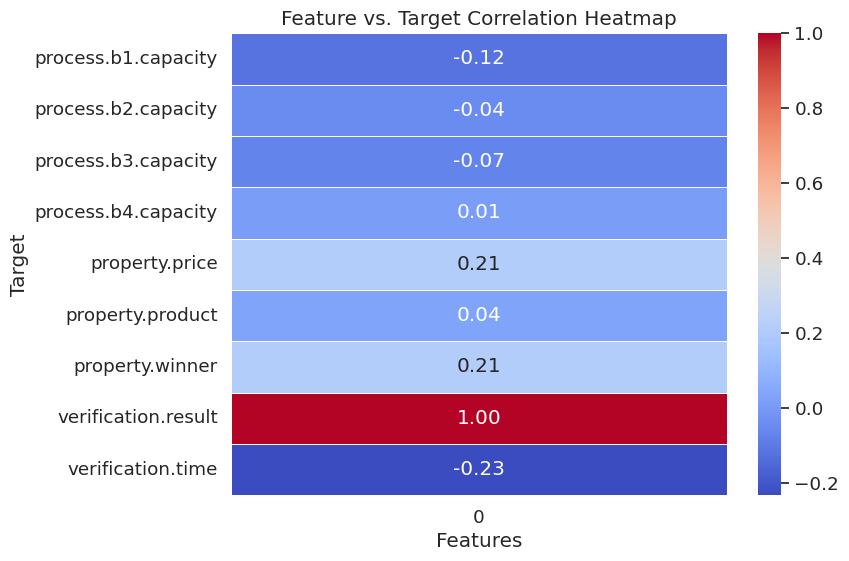

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix between features and the target
feature_target_corr = df.corrwith(df['verification.result'])

# Set up the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust the font scale as needed
sns.heatmap(data=feature_target_corr.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Set the title and labels
plt.title("Feature vs. Target Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Target")

# Show the plot
plt.show()

Analysy of **heatmap seems** to be relevant to our presictions in **primary data analysis** section

Create a method to check model on validation dataset

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def classification_evaluation(model, X_val, y_val):
    """
    Evaluate a classification model on a validation dataset and return metrics.

    Args:
    - model: A trained classification model (e.g., RandomForestClassifier, LogisticRegression, etc.).
    - X_val: Validation feature data.
    - y_val: True labels for the validation data.

    Returns:
    - accuracy: Accuracy of the model.
    - precision: Precision score.
    - recall: Recall score.
    - f1: F1 score.
    - confusion: Confusion matrix.
    """
    # Make predictions on the validation data
    y_val_pred = model.predict(X_val)

    # Calculate classification metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    confusion = confusion_matrix(y_val, y_val_pred)

    return accuracy, precision, recall, f1, confusion

Split dataset to Train/Test/Validation

In [87]:
#Splitting dataset on train/validation/test
X = df.drop('verification.result', axis=1)
X = X.drop('verification.time', axis=1)
X = X.drop('property.winner', axis=1)
y = df['verification.result']

# Split the data into train (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the splits to verify
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (1430, 6) (1430,)
Validation set: (306, 6) (306,)
Test set: (307, 6) (307,)


In [88]:
accuracy = {}
speed = {}

**GradientBoostingClassifier** model

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from time import time
import numpy as np


model = GradientBoostingClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

model.fit(X_train, y_train)

speed['GradientBoosting'] = np.round(time() - start, 3)
accuracy['GradientBoosting'] = np.mean(score).round(3)

print(f"Mean Accuracy: {accuracy['GradientBoosting']}\nStd: {np.std(score):.3f}\nRun time: {speed['GradientBoosting']}s")

Mean Accuracy: 0.888
Std: 0.010
Run time: 10.805s


In [90]:
#check on validation dataset
fin_accuracy, precision, recall, f1, confusion = classification_evaluation(model, X_val, y_val)

# Print the evaluation metrics
print(f"Accuracy: {fin_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8627450980392157
Precision: 0.47619047619047616
Recall: 0.5
F1 Score: 0.4878048780487805
Confusion Matrix:
[[244  22]
 [ 20  20]]


**HistGradientBoostingClassifier** model:

In [91]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

model_1 = HistGradientBoostingClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
score = cross_val_score(model_1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
model_1.fit(X_train, y_train)
speed['HistGradientBoosting'] = np.round(time() - start, 3)
accuracy['HistGradientBoosting'] = np.mean(score).round(3)

print(f"Mean Accuracy: {accuracy['HistGradientBoosting']}\nStd: {np.std(score):.3f}\nRun time: {speed['HistGradientBoosting']}s")

Mean Accuracy: 0.86
Std: 0.017
Run time: 17.335s


In [93]:
#check on validation dataset
fin_accuracy, precision, recall, f1, confusion = classification_evaluation(model_1, X_val, y_val)

# Print the evaluation metrics
print(f"Accuracy: {fin_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8431372549019608
Precision: 0.4
Recall: 0.4
F1 Score: 0.4000000000000001
Confusion Matrix:
[[242  24]
 [ 24  16]]


**LGBMClassifier** model:

In [94]:
from lightgbm import LGBMClassifier

model_2 = LGBMClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
score = cross_val_score(model_2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
model_2.fit(X_train, y_train)
speed['LGBM'] = np.round(time() - start, 3)
accuracy['LGBM'] = np.mean(score).round(3)

print(f"Mean Accuracy: {accuracy['LGBM']}\nStd: {np.std(score):.3f}\nRun time: {speed['LGBM']}s")

[LightGBM] [Info] Number of positive: 183, number of negative: 1247
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 1430, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127972 -> initscore=-1.919010
[LightGBM] [Info] Start training from score -1.919010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [95]:
#check on validation dataset
fin_accuracy, precision, recall, f1, confusion = classification_evaluation(model_2, X_val, y_val)

# Print the evaluation metrics
print(f"Accuracy: {fin_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8496732026143791
Precision: 0.42857142857142855
Recall: 0.45
F1 Score: 0.4390243902439024
Confusion Matrix:
[[242  24]
 [ 22  18]]


Bagging classification:

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier()

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

y_val_pred = bagging_classifier.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8366013071895425
Precision: 0.38095238095238093
Recall: 0.4
F1 Score: 0.3902439024390244


Comparation of RandomForestClassifier / StackingClassifier / XGBClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
#
# Load the IRIS dataset
#
#
# Create a Randomforest classifier
#
forest = RandomForestClassifier(n_estimators=100, random_state=123)
#
# Create a XGBoost classifier
#
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)
#
# Create a Logistic regression classifier
#
lgclassifier = LogisticRegression(random_state=123)
#
# Create a stacking classifier
#
estimators = [
     ('rf', forest),
     ('xgb', boost)
]
sclf = StackingClassifier(estimators=estimators, final_estimator=lgclassifier, cv=10)
#
# Fit the random forest classifier; Print the scores
#
forest.fit(X_train, y_train)
print(f"Random forest model training Accuracy: {forest.score(X_train, y_train):0.2f}")
print(f"Random forest model test Accuracy: {forest.score(X_test, y_test):0.2f}")
#
# Fit the XGBoost classifier; Print the scores
#
boost.fit(X_train, y_train)
print(f"\nXGBoost model training Accuracy: {boost.score(X_train, y_train):0.2f}")
print(f"XGBoost model test Accuracy: {boost.score(X_test, y_test):0.2f}")
#
# Fit the Stacking classifier; Print the scores
#
sclf.fit(X_train, y_train)
print(f"Stacking classifier training Accuracy: {sclf.score(X_train, y_train):0.2f}")

print(f"Stacking classifier test Accuracy: {sclf.score(X_test, y_test):0.2f}")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Random forest model training Accuracy: 0.92
Random forest model test Accuracy: 0.82

XGBoost model training Accuracy: 0.92
XGBoost model test Accuracy: 0.82


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Stacking classifier training Accuracy: 0.91
Stacking classifier test Accuracy: 0.83
